In [1]:
kaggle competitions download -c dogs-vs-cats

SyntaxError: invalid syntax (<ipython-input-1-b4618f0b8c86>, line 1)

In [1]:
import os
import zipfile

In [2]:
print(os.listdir("../"))

['25 Open Datasets for Deep Learning Every Data Scientist Must Work With.pdf', 'blackteddy.txt', 'CNN', 'course-v3-master', 'Coursera _ Online Courses & Credentials From Top Educators. Join for Fre1e.pdf', 'Coursera _ Online Courses & Credentials From Top Educators. Join for Free.pdf', 'Coursera _ Online Courses & Credentials From Top Educators. Join for Frepe.pdf', 'Coursera _ Online Courses & Credentials From Top Educators. Join for2 Free.pdf', 'Coursera _ Online Courses & Credentials From Top Educators. Join for9 Free.pdf', 'creatingdataset-cleaning-it.ipynb', 'Deep Learning with Python.pdf', 'Deep Learning _ Coursera.pdf', 'dlaicourse_Course 1 - Part 6 - Lesson 2 - Notebook.ipynb at master · lmoroney_dlaicourse.pdf', 'dlaicourse_Course 1 - Part 8 - Lesson 3 - Notebook.ipynb at master · lmoroney_dlaicourse.pdf', 'fAi lesson 1', 'fAi lesson 2', 'fai lesson 3', 'Geoffry Hinton.mp4', 'grizzlyteddy.txt', 'Image Classification in 10 Minutes with MNIST Dataset.pdf', 'Image Filtering.pdf',

In [5]:
local_zip = 'dogs-vs-cats.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dogs-vs-cats')
zip_ref.close()

In [3]:
import sys
print(sys.path)

['G:\\Computational Neural Networks for Vision Recognition\\CNN', 'C:\\Program Files\\Python37\\python37.zip', 'C:\\Program Files\\Python37\\DLLs', 'C:\\Program Files\\Python37\\lib', 'C:\\Program Files\\Python37', 'g:\\computational neural networks for vision recognition\\cnn\\venv', '', 'g:\\computational neural networks for vision recognition\\cnn\\venv\\lib\\site-packages', 'C:\\Users\\Bilal Akbar\\AppData\\Roaming\\Python\\Python37\\site-packages', 'C:\\Program Files\\Python37\\lib\\site-packages', 'g:\\computational neural networks for vision recognition\\cnn\\venv\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Bilal Akbar\\.ipython']


In [14]:
train_CD_Dir=os.path.join('dogs-vs-cats/train/')
test_CD_Dir=os.path.join('dogs-vs-cats/test')

In [7]:
train_CD_Name=os.listdir(train_CD_Dir)
print(train_CD_Name[:10])

['Cat', 'Dog']


In [16]:
Dog_Test_Dir=train_CD_Dir + 'Dog'
Cat_Test_Dir=train_CD_Dir + 'Cat'

print("Dog Pictures : " , len(os.listdir(Dog_Test_Dir)))
print("Cat Pictures : " , len(os.listdir(Cat_Test_Dir)))

DogFiles=os.listdir(Dog_Test_Dir)
CatFiles=os.listdir(Cat_Test_Dir)

print(DogFiles[:10])
print(CatFiles[:10])

Dog Pictures :  12500
Cat Pictures :  12500
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.10000.jpg', 'dog.10001.jpg', 'dog.10002.jpg', 'dog.10003.jpg', 'dog.10004.jpg']
['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg']


In [17]:
test_CD_Name=os.listdir(test_CD_Dir)
print(test_CD_Name[:10])

['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg']


In [18]:
print("Total Train images in Cats & Dog Folder = ", len(os.listdir(train_CD_Dir)))
print("Total Test images in Cats & Dog Folder = ", len(os.listdir(test_CD_Dir)))

Total Train images in Cats & Dog Folder =  2
Total Test images in Cats & Dog Folder =  12500


In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

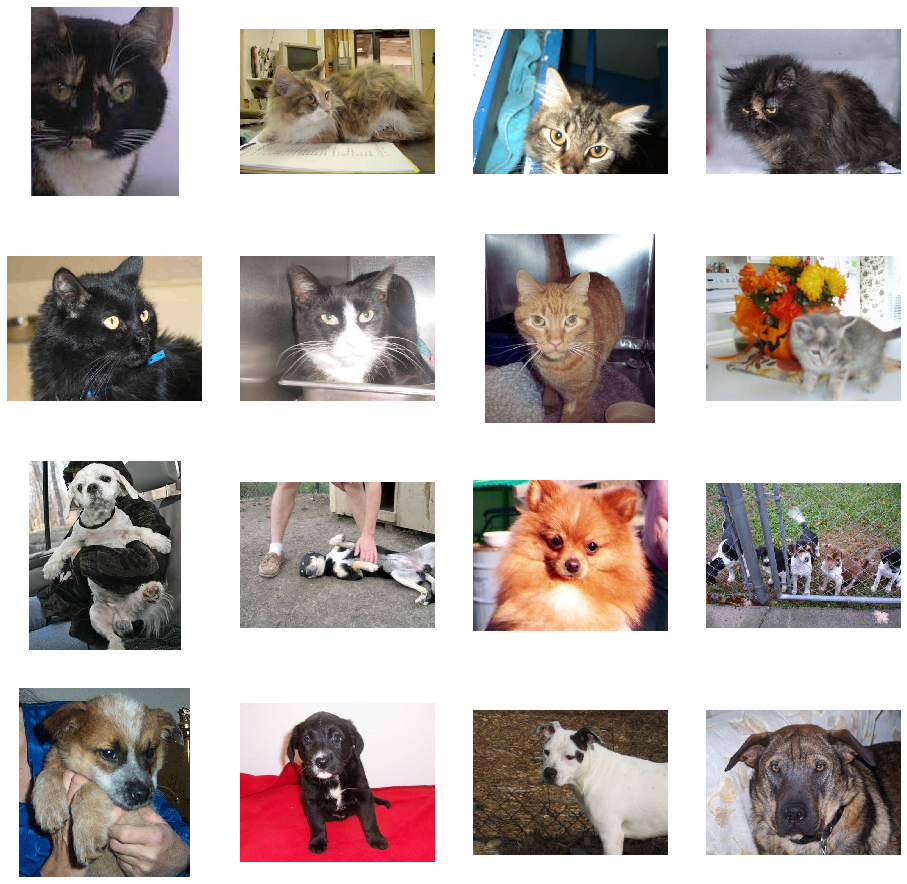

In [26]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 16
next_Cat_pix = [os.path.join(Cat_Test_Dir, fname) 
                for fname in CatFiles[pic_index-8:pic_index]]
next_Dog_pix = [os.path.join(Dog_Test_Dir, fname) 
                for fname in DogFiles[pic_index-8:pic_index]]

for i, img_path in enumerate(next_Cat_pix + next_Dog_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [28]:
import tensorflow as tf


In [29]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [31]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        'dogs-vs-cats/train',  
        target_size=(300, 300),
        batch_size=128,        
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        'dogs-vs-cats/test',  
        target_size=(300, 300), 
        batch_size=32,        
        class_mode='categorical')

Found 25000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [41]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=1,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8,
 #     callbacks=[callbacks]
)

8/8 [==============================] - 67s 8s/step - loss: 1.7525e-06 - acc: 1.0000 - val_loss: 1.5404e-07 - val_acc: 1.0000


In [49]:
import numpy as np
from keras.preprocessing import image




In [53]:
import matplotlib.pyplot as plt
image_index = 1000
print(train_CD_Name[image_index])

cat.10898.jpg


In [57]:
img = mpimg.imread(train_CD_Dir+'/' +train_CD_Name[image_index])
print(img)

[[[ 59  57  58]
  [ 59  57  58]
  [ 59  57  58]
  ...
  [ 57  57  57]
  [ 57  57  57]
  [ 57  57  57]]

 [[ 58  56  57]
  [ 59  57  58]
  [ 59  57  58]
  ...
  [ 56  56  56]
  [ 56  56  56]
  [ 56  56  56]]

 [[ 58  56  57]
  [ 58  56  57]
  [ 59  57  58]
  ...
  [ 54  54  54]
  [ 54  54  54]
  [ 54  54  54]]

 ...

 [[208 198 188]
  [209 199 189]
  [211 201 191]
  ...
  [215 200 193]
  [214 199 192]
  [214 199 192]]

 [[212 202 192]
  [211 201 191]
  [210 200 190]
  ...
  [214 199 192]
  [214 199 192]
  [213 198 191]]

 [[217 207 197]
  [214 204 194]
  [208 198 188]
  ...
  [209 194 187]
  [209 194 187]
  [209 194 187]]]


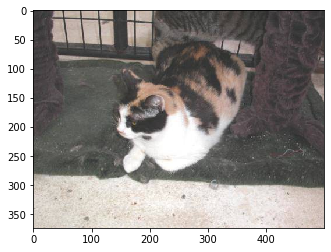

In [58]:
imgplot = plt.imshow(img)


In [61]:
  classes = model.predict(img.reshape(300, 300, 3), batch_size=10)


ValueError: cannot reshape array of size 561000 into shape (300,300,3)